**Linear Regression**

Import the required libraries


In [30]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

**Upload your ".csv" file to googlecolab/jupyter notebook**

read your dataset into the program

plot the correlation map if you have more than 2 columns in your dataset

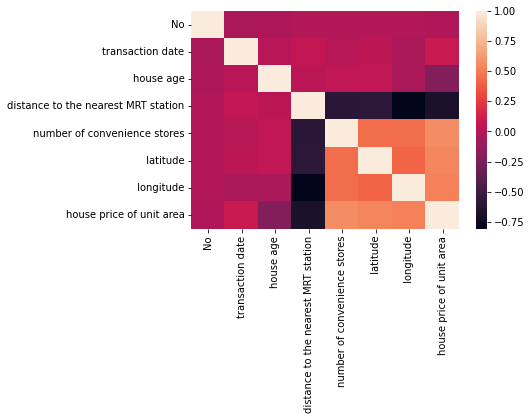

In [31]:
dataset = pd.read_csv('/content/real_estate.csv')  #read the dataset from the file location in google colab
sn.heatmap(dataset.corr(), annot= False, fmt='g')  #plot the correlation map to check which features (x) best describe the label (y)
plt.show()

**Use this function to visualize your dataset columns and rows**

In [32]:
dataset.head  

<bound method NDFrame.head of       No  transaction date  ...   longitude  house price of unit area
0      1          2012.917  ...   121.54024                      37.9
1      2          2012.917  ...   121.53951                      42.2
2      3          2013.583  ...   121.54391                      47.3
3      4          2013.500  ...   121.54391                      54.8
4      5          2012.833  ...   121.54245                      43.1
..   ...               ...  ...         ...                       ...
409  410          2013.000  ...   121.50381                      15.4
410  411          2012.667  ...   121.54310                      50.0
411  412          2013.250  ...   121.53986                      40.6
412  413          2013.000  ...   121.54067                      52.5
413  414          2013.500  ...   121.54310                      63.9

[414 rows x 8 columns]>

**Select your feature and label values from your dataset**

Perform the necessary pre-processing functions

In [33]:
data= dataset[['number of convenience stores', 'house price of unit area']]  #select one column (feature) that best describes your label and enter the x and y column names here
data.columns = ['no. of stores', 'house price']  #if the column names are too long, you can change them using this command
data.head

<bound method NDFrame.head of      no. of stores  house price
0               10         37.9
1                9         42.2
2                5         47.3
3                5         54.8
4                5         43.1
..             ...          ...
409              0         15.4
410              9         50.0
411              7         40.6
412              5         52.5
413              9         63.9

[414 rows x 2 columns]>

In [34]:
data.isnull().sum()  #check for any missing values in your dataset
#data.fillna(method ='ffill', inplace = True) or data.fillna(0) or data.dropna(inplace = True)
#if there are any missing values, fill them with either the previous value or with 0 or delete that row

no. of stores    0
house price      0
dtype: int64

In [35]:
x = np.array(data['no. of stores']).reshape(-1,1) #describe your feature array (there is only 1 column but unknown ro. of rows, hence reshape the array as (-1,1))
y = np.array(data['house price']).reshape(-1,1)   #describe your label array 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)  #split your dataset into training data and testing data

**Train your dataset**

In [36]:
regr = LinearRegression()  #call the linear regression class from sklearn module using an object name (here our object is 'regr')
regr.fit(x_train, y_train) #access the '.fit' function of the linear regression class to train the data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Test your dataset**

Visualize your test data 

In [37]:
y_pred = regr.predict(x_test)  #predict the new (test) data using your trained model
regr.score(x_test, y_test) #check how well your model has performed on the test data (accuracy)

0.2253895281794148

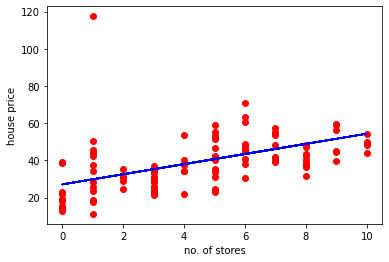

In [38]:
plt.scatter(x_test, y_test, color ='red')
plt.plot(x_test, y_pred, color ='blue')
plt.xlabel('no. of stores')
plt.ylabel('house price')
plt.show()